In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/market_basket_analysis.zip"  # Update if your path is different
extract_folder = "/content/market_basket_analysis"  # no .zip extension

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Confirm files were extracted
!ls /content/market_basket_analysis


Assignment-1_Data.csv  Assignment-1_Data.xlsx


In [ ]:
import pandas as pd

market_path = "/content/market_basket_analysis/Assignment-1_Data.csv"

# Read the CSV with proper delimiter
df = pd.read_csv(market_path, delimiter=';', on_bad_lines='skip')

# Show first few rows
df.head()


/tmp/ipython-input-9-3470855353.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(market_path, delimiter=';', on_bad_lines='skip')


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  object 
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 27.9+ MB
None


In [ ]:
print(df.isnull().sum())


BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64


In [ ]:
# 1. Drop rows with missing Itemname
df.dropna(subset=['Itemname'], inplace=True)

# 2. Convert Price to float (replace comma with dot)
df['Price'] = df['Price'].str.replace(',', '.').astype(float)

# 3. Convert Date to datetime object
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y %H:%M')

# 4. Convert CustomerID to string (optional: you can drop rows if you don't need unknown customers)
df['CustomerID'] = df['CustomerID'].astype('Int64').astype('str')

# 5. Drop duplicates if any
df.drop_duplicates(inplace=True)

# 6. Reset index (optional but clean)
df.reset_index(drop=True, inplace=True)

df.head()


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515325 entries, 0 to 515324
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      515325 non-null  object        
 1   Itemname    515325 non-null  object        
 2   Quantity    515325 non-null  int64         
 3   Date        515325 non-null  datetime64[ns]
 4   Price       515325 non-null  float64       
 5   CustomerID  515325 non-null  object        
 6   Country     515325 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 27.5+ MB


In [ ]:
print(df.isnull().sum())


BillNo        0
Itemname      0
Quantity      0
Date          0
Price         0
CustomerID    0
Country       0
dtype: int64


In [ ]:
df.tail()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
515320,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
515321,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
515322,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
515323,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France
515324,581587,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France


In [ ]:
!pip install mlxtend


In [ ]:
# Group items by BillNo and put them in a list
basket_df = df.groupby('BillNo')['Itemname'].apply(list).reset_index()
basket_df.head()


,BillNo,Itemname
0,536365,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET..."
1,536366,"[HAND WARMER UNION JACK, HAND WARMER RED POLKA..."
2,536367,"[ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO..."
3,536368,"[JAM MAKING SET WITH JARS, RED COAT RACK PARIS..."
4,536369,[BATH BUILDING BLOCK WORD]


In [ ]:
from mlxtend.preprocessing import TransactionEncoder

# Transform the list of items into a binary format
te = TransactionEncoder()
te_result = te.fit(basket_df['Itemname']).transform(basket_df['Itemname'])

# Create a DataFrame
basket_matrix = pd.DataFrame(te_result, columns=te.columns_)
basket_matrix.head()


,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from mlxtend.frequent_patterns import apriori

# Get frequent itemsets with minimum support of 0.02 (you can tune this)
frequent_itemsets = apriori(basket_matrix, min_support=0.02, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False).head()


,support,itemsets
263,0.108956,(WHITE HANGING HEART T-LIGHT HOLDER)
97,0.102128,(JUMBO BAG RED RETROSPOT)
190,0.094211,(REGENCY CAKESTAND 3 TIER)
151,0.081940,(PARTY BUNTING)
122,0.076249,(LUNCH BAG RED RETROSPOT)


In [ ]:
from mlxtend.frequent_patterns import association_rules

# Get association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules.sort_values(by='lift', ascending=False)
rules.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
152,"(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.036170,0.036418,0.025482,0.704514,19.345428,1.0,0.024165,3.261013,0.983896,0.540966,0.693347,0.702121
157,(PINK REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...",0.036418,0.036170,0.025482,0.699728,19.345428,1.0,0.024165,3.209858,0.984149,0.540966,0.688460,0.702121
156,(GREEN REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...",0.048243,0.028204,0.025482,0.528205,18.728115,1.0,0.024122,2.059785,0.994587,0.500000,0.514513,0.715857
153,"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.028204,0.048243,0.025482,0.903509,18.728115,1.0,0.024122,9.863659,0.974077,0.500000,0.898618,0.715857
24,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.048243,0.036418,0.029936,0.620513,17.038810,1.0,0.028179,2.539170,0.989024,0.547016,0.606170,0.721262


/tmp/ipython-input-19-3109400520.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_rules['antecedents'] = top_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
/tmp/ipython-input-19-3109400520.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_rules['consequents'] = top_rules['consequents'].apply(lambda x: ', '.join(list(x)))


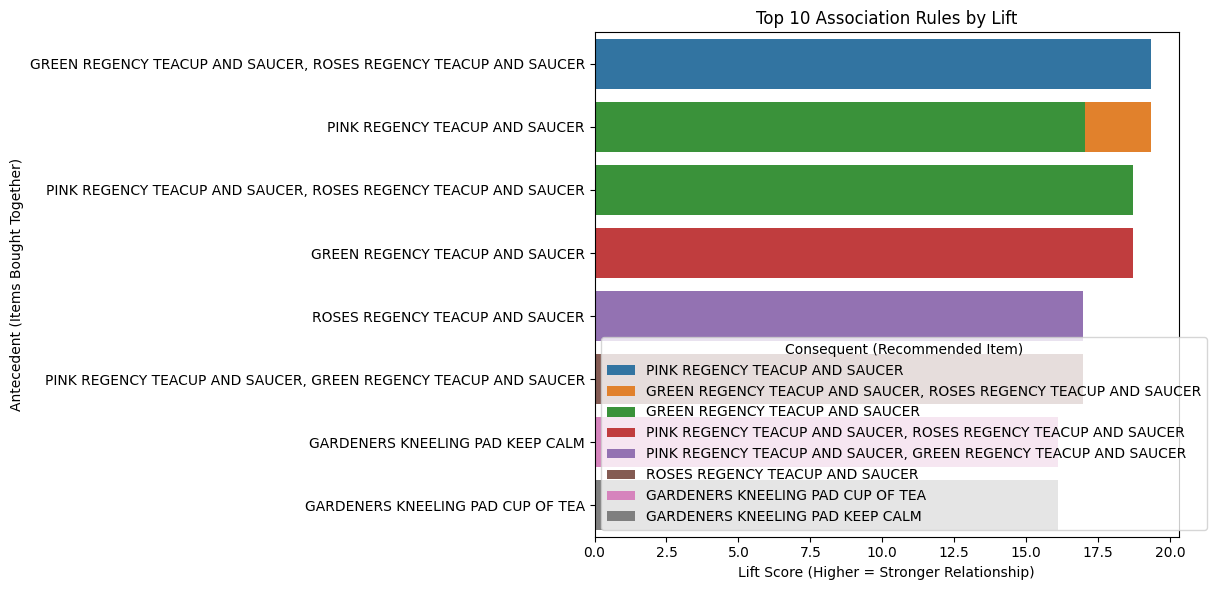

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 rules by lift
top_rules = rules.head(10)

# Convert frozensets to strings for readability
top_rules['antecedents'] = top_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
top_rules['consequents'] = top_rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Set plot size and style
plt.figure(figsize=(12, 6))
sns.barplot(x='lift', y='antecedents', data=top_rules, hue='consequents', dodge=False)

plt.xlabel("Lift Score (Higher = Stronger Relationship)")
plt.ylabel("Antecedent (Items Bought Together)")
plt.title("Top 10 Association Rules by Lift")
plt.legend(title="Consequent (Recommended Item)")
plt.tight_layout()
plt.show()
